In [33]:
#start from the top of 2 (read the unit 2 doc first!!!)
#basic imports, device agnostic code
import torch
from torch import nn
import matplotlib.pyplot as plt

#device agnostic code:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"



In [34]:
#now, lets get that data setup:
from sklearn.datasets import make_circles
import pandas as pd

num_circles = 1000
noise = 0.03

#X is numpy array size (num,2), y is numpy array size (num,) with the associated labels
X,Y = make_circles(n_samples=num_circles,shuffle=True,noise=noise)

data = {
    "X-Value": X[:,0], #X-Value will be 2d tensor size (num,1)
    "Y-Value": X[:,1], #size (num,1)
    "Label":Y #size (num)
}

df_circles = pd.DataFrame(data=data) #these are numpy arrays and float 64s
df_circles["X-Value"].head(10),df_circles["Y-Value"].head(10),df_circles["Label"].head(10),df_circles.value_counts()

(0    0.089190
 1    0.795979
 2   -0.328374
 3   -0.031048
 4   -0.446745
 5   -0.127559
 6    0.730941
 7   -0.762917
 8   -0.324035
 9    0.767497
 Name: X-Value, dtype: float64,
 0    0.958563
 1   -0.020085
 2    1.003543
 3    0.785150
 4   -0.658465
 5    0.762016
 6   -0.222836
 7    0.233110
 8    0.696095
 9    0.296821
 Name: Y-Value, dtype: float64,
 0    0
 1    1
 2    0
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: Label, dtype: int64,
 X-Value    Y-Value    Label
 -1.040017  -0.118012  0        1
  0.448950   0.606515  1        1
  0.422520  -0.913403  0        1
  0.428565   0.643684  1        1
  0.429594  -0.697177  1        1
                               ..
 -0.415479   0.651828  1        1
 -0.413906   0.703257  1        1
 -0.412881  -0.635709  1        1
 -0.411730   0.939754  0        1
  1.053033   0.066012  0        1
 Name: count, Length: 1000, dtype: int64)

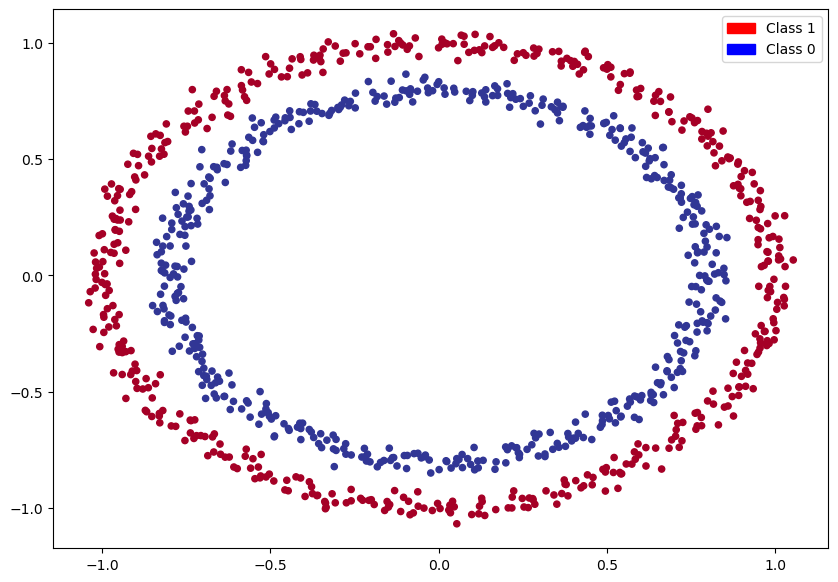

In [35]:
#now, lets display the data using matplotlib:
import matplotlib.patches as mpatches


red_label = mpatches.Patch(color="red",label="Class 1")
blue_label = mpatches.Patch(color="blue",label="Class 0")

plt.figure(figsize=(10,7))
plt.scatter(df_circles["X-Value"],df_circles["Y-Value"],s=20,c=df_circles["Label"],cmap=plt.cm.RdYlBu)
plt.legend(handles=[red_label,blue_label])


In [36]:
#now, lets get our data into tensors!

X_data = torch.from_numpy(X).type(torch.float).to(device)
Y_labels = torch.from_numpy(Y).type(torch.float).to(device)

X_data[:5],Y_labels[:5]


(tensor([[ 0.0892,  0.9586],
         [ 0.7960, -0.0201],
         [-0.3284,  1.0035],
         [-0.0310,  0.7852],
         [-0.4467, -0.6585]], device='mps:0'),
 tensor([0., 1., 0., 1., 1.], device='mps:0'))

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_labels,train_size=0.8)
print(f"The Training Data is size: {X_train.shape}, Testing data: {X_test.shape}, Training Labels: {Y_train.shape}, Testing Labels: {Y_test.shape}")

The Training Data is size: torch.Size([800, 2]), Testing data: torch.Size([200, 2]), Training Labels: torch.Size([800]), Testing Labels: torch.Size([200])


In [38]:
#now that we have our data, we make our model: lets do it 3 ways, hop immediantly on the non-linear version, but
#once without the torch.nn.Sequential to make sure u get it

class NonLinearCirclesModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential1 = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=1),
        )
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.sequential1(x)

torch.manual_seed(41)
model = NonLinearCirclesModel().to(device)
print(model.state_dict())


OrderedDict({'sequential1.0.weight': tensor([[-0.3727, -0.3866],
        [ 0.4250, -0.4678],
        [-0.3324,  0.3847],
        [-0.5258,  0.3468],
        [ 0.4306,  0.1919],
        [ 0.1267,  0.2734],
        [ 0.5349,  0.0575],
        [-0.5091,  0.6524],
        [ 0.5185, -0.0164],
        [-0.4134, -0.2739]], device='mps:0'), 'sequential1.0.bias': tensor([-0.6243,  0.4686, -0.0614,  0.4872,  0.2662, -0.1403, -0.4522,  0.2461,
        -0.4537, -0.1571], device='mps:0'), 'sequential1.2.weight': tensor([[ 0.1880, -0.1722, -0.0155, -0.0429,  0.0362,  0.3045,  0.1849, -0.1187,
          0.2798, -0.1028],
        [ 0.1303,  0.1309, -0.0096, -0.2943,  0.2973, -0.0730,  0.2154, -0.1897,
         -0.0323,  0.2711],
        [-0.2744,  0.0122, -0.0041, -0.2703, -0.0613, -0.2899,  0.0683,  0.0533,
          0.1809,  0.0079],
        [-0.1273, -0.1140, -0.1181,  0.2460,  0.1013, -0.3149,  0.0565, -0.0422,
          0.2307, -0.0925],
        [ 0.2760,  0.0977, -0.2849,  0.0665, -0.0722,  0.15

In [39]:
#Now, lets see what our model predicts

#first, move the data to the GPU (even though for displaying you dont need that):
X_train,X_test,Y_train,Y_test = (tensor.to(device) for tensor in [X_train,X_test,Y_train,Y_test])
for tensor in [X_train,X_test,Y_train,Y_test]:
    print(tensor.device)

with torch.inference_mode():
    model.eval()
    y_blind_logit_preds = model(X_test) #these are the logits that the model is predictions w/o any training
    y_blind_preds = torch.round(torch.sigmoid(y_blind_logit_preds)) #this will be size (200,1)

    #lets see how its doing:
    print(f"Real labels: {Y_test[:10]}")
    print(f"Predicted labels: {y_blind_preds.squeeze()[:10]}")

    

mps:0
mps:0
mps:0
mps:0
Real labels: tensor([1., 1., 1., 0., 1., 0., 0., 1., 0., 1.], device='mps:0')
Predicted labels: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='mps:0')


In [40]:
#lets also use the plot_descision_boundaries to see how our model is preforming rn for all points on the chart:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("Already downloaded! Skipping Download...")
else:
    request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open(file="helper_functions.py",mode="wb",newline="") as file:
        file.write(request.content)

from helper_functions import plot_decision_boundary

Already downloaded! Skipping Download...


Text(0.5, 1.0, 'Testing Data')

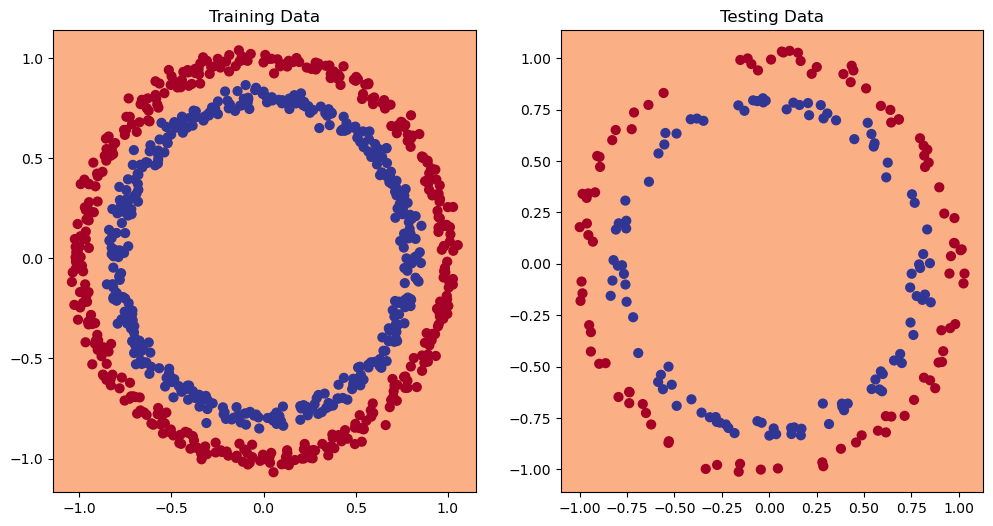

In [41]:
#now, lets just see the descision boundaries:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,X_train,Y_train)
plt.title("Training Data")

plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,Y_test)
plt.title("Testing Data")



In [42]:
#now, define the loss and optimizer:
loss_fn = torch.nn.BCEWithLogitsLoss() #must be with logits bc we are not using teh nn.sigmoid at the end 
#BCELoss expects prediction probabilities
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [43]:
#lets write the accuracy function just to make sure you get how it works:

def accuracy_fn(actual_labels: torch.Tensor,predicted_labels: torch.Tensor):
    #actual labels will be size (800,) or(200,), predicted labels, preconditioned shoudl be the same!
    num_correct = torch.eq(actual_labels,predicted_labels).sum().item()
    accuracy = (num_correct / len(predicted_labels)) * 100
    return accuracy

In [44]:
#now the path stuff
from pathlib import Path
from datetime import datetime

#define Consts:
MODEL_NAME = "UNIT2_MODEL1"
EXPERIMENT_NAME = "exp1"

now = datetime.now()
TIMESTAMP =f"{now.month}_{now.day}_{str(now.year)[-2:]}_@_{now.strftime("%I_%M_%S%p")}"

#now for the basic directories:

BASE_DIR = Path(MODEL_NAME)
EXPERIMENT_DIR = BASE_DIR / f"{EXPERIMENT_NAME}"

MODEL_DIR = EXPERIMENT_DIR / "model"
RESULTS_DIR = EXPERIMENT_DIR / "results"
GRAPHS_DIR = EXPERIMENT_DIR / "graphs"
LOSS_GRAPH_DIR = GRAPHS_DIR / "loss"
ACC_GRAPH_DIR = GRAPHS_DIR / "acc"

for directory in [MODEL_DIR,RESULTS_DIR,GRAPHS_DIR,LOSS_GRAPH_DIR,ACC_GRAPH_DIR]:
    directory.mkdir(parents=True,exist_ok=True)

#Now, define the paths:
MODEL_PATH = MODEL_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
RESULTS_PATH = RESULTS_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
LOSS_GRAPH_PATH = LOSS_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"
ACC_GRAPH_PATH = ACC_GRAPH_DIR / f"{MODEL_NAME}_{EXPERIMENT_NAME}_{TIMESTAMP}"




In [45]:
#NOW FINALLY THE TRAINING/TESTING LOOP (remember to use teh torchmetrics accuracy function)
from torchmetrics.classification import Accuracy
import csv

#both the data and the model is on the gpu, just remember to squeeze the model output so it can be compared
#to the labels which are size (n,) nor (n,1)

epochs = 10000
model=model.to(device)

with open(file=RESULTS_PATH,mode="w",newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch","Training Loss","Testing Loss","Training Accuracy","Testing Accuracy"])
    #ralso, initialize the accuracy writers
    training_accuracy = Accuracy(task="binary",num_classes=2).to(device) #REMEMBER THE ACCURACY OBJECT MUST BE ON GPU
    testing_accuracy = Accuracy(task="binary",num_classes=2).to(device)

    for epoch in range(epochs):

        #first, forward pass on the data:
        y_logit_preds = model(X_train).squeeze() #this should make even the preds of type (800,), which is compatible
        #now, convert the logits into actual predictions:
        y_preds = torch.round(torch.sigmoid(y_logit_preds)) #form [0,1,0,0,0,1,0]
        #calculate the loss:
        loss = loss_fn(y_logit_preds,Y_train) #should be compatible

        #add the current batch(entire epoch) to the accuracy:
        training_accuracy.reset()
        training_accuracy.update(y_preds,Y_train)

        #rest of training loop as expected:
        #first zero the gradients
        optimizer.zero_grad()

        #now, find the gradients again:
        loss.backward()

        #now, step the optimizer:
        optimizer.step()

        #TESTING LOOP:
        with torch.inference_mode():
            model.eval()
            #forward pass on the data:
            y_test_logit_preds = model(X_test).squeeze()
            y_test_preds = torch.round(torch.sigmoid(y_test_logit_preds))

            #calculate the testing loss:
            test_loss = loss_fn(y_test_logit_preds,Y_test)

            #update the testing accuracy:
            testing_accuracy.reset()
            testing_accuracy.update(y_test_preds,Y_test)

            #lastly, prepare to write the data to a csv:

            training_loss_write = loss.detach().cpu().numpy()
            testing_loss_write = test_loss.detach().cpu().numpy()
            training_accuracy_write = training_accuracy.compute().item()
            testing_accuracy_write = testing_accuracy.compute().item()

            #now, lets write this stuff to the csv:

            writer.writerow([epoch,training_loss_write,testing_loss_write,training_accuracy_write,testing_accuracy_write])

            #lastly, lets print every so often so we know whats up:

            if epoch % 100 == 0:
                print(f"Epoch: {epoch} | Training Loss: {training_loss_write} | Testing Loss: {testing_loss_write} | Training Acccuracy: {training_accuracy_write} | Testing Accuracy: {testing_accuracy_write}")







Epoch: 0 | Training Loss: 0.7015135884284973 | Testing Loss: 0.7043971419334412 | Training Acccuracy: 0.5012500286102295 | Testing Accuracy: 0.4950000047683716
Epoch: 100 | Training Loss: 0.6914286017417908 | Testing Loss: 0.693702757358551 | Training Acccuracy: 0.5262500047683716 | Testing Accuracy: 0.4950000047683716
Epoch: 200 | Training Loss: 0.6892974376678467 | Testing Loss: 0.6919406056404114 | Training Acccuracy: 0.606249988079071 | Testing Accuracy: 0.5400000214576721
Epoch: 300 | Training Loss: 0.6867364645004272 | Testing Loss: 0.6898833513259888 | Training Acccuracy: 0.6412500143051147 | Testing Accuracy: 0.5649999976158142
Epoch: 400 | Training Loss: 0.6830248832702637 | Testing Loss: 0.687349259853363 | Training Acccuracy: 0.6650000214576721 | Testing Accuracy: 0.5649999976158142
Epoch: 500 | Training Loss: 0.6781278848648071 | Testing Loss: 0.6842158436775208 | Training Acccuracy: 0.6512500047683716 | Testing Accuracy: 0.574999988079071
Epoch: 600 | Training Loss: 0.6712

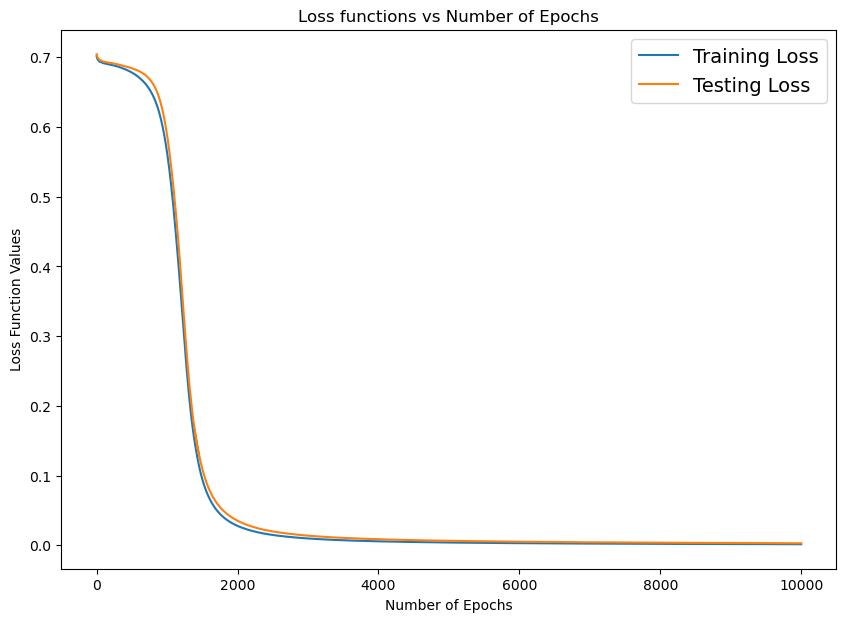

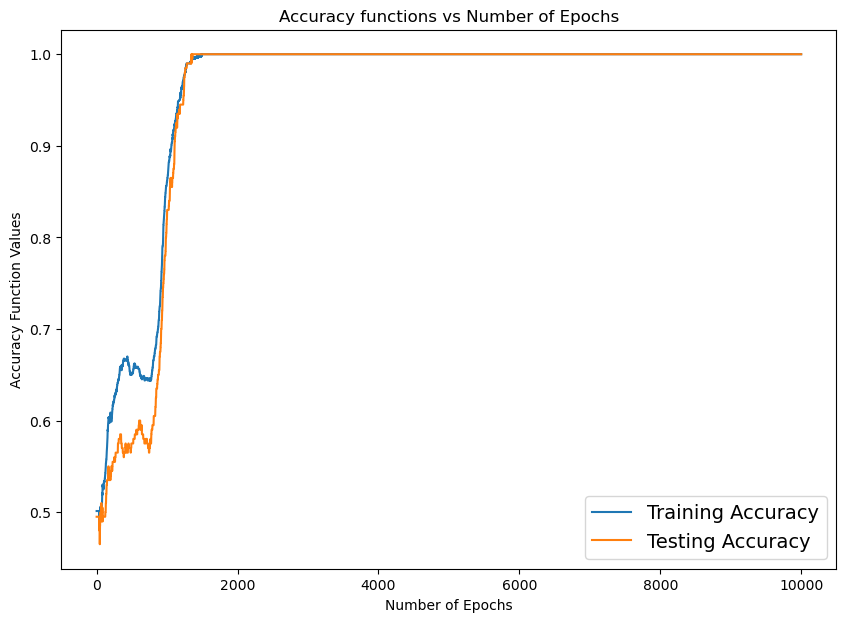

In [46]:
#now, lets make a graph of the loss functions and accuracy functions:

#first, isert the csv into a dataframe:
df = pd.read_csv(filepath_or_buffer=RESULTS_PATH)

#now, just plot it:
plt.figure(figsize=(10,7))
plt.plot(df["Epoch"],df["Training Loss"],label="Training Loss")
plt.plot(df["Epoch"],df["Testing Loss"],label="Testing Loss")
plt.title("Loss functions vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Function Values")
plt.legend(prop={"size":14})
plt.savefig(LOSS_GRAPH_PATH)
plt.show()
plt.close()

plt.figure(figsize=(10,7))
plt.plot(df["Epoch"],df["Training Accuracy"],label="Training Accuracy")
plt.plot(df["Epoch"],df["Testing Accuracy"],label="Testing Accuracy")
plt.title("Accuracy functions vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Function Values")
plt.legend(prop={"size":14})
plt.savefig(ACC_GRAPH_PATH)
plt.show()
plt.close()

In [47]:
#now lets see what our model's predictions are. first, lets look at the logits:

with torch.inference_mode():
    model.eval()
    y_infer_logits_preds = model(X_test).squeeze()
    y_infer_preds = torch.round(torch.sigmoid(y_infer_logits_preds))

print(f"The logits that the model returns are: {y_infer_logits_preds[:5]}")
print(f"These correspond to the labels: {y_infer_preds[:5]}")
print(f"Whereas the real labels are: {Y_test[:5]}")


The logits that the model returns are: tensor([12.2542,  2.0297, 10.5688, -7.5508,  6.9358], device='mps:0')
These correspond to the labels: tensor([1., 1., 1., 0., 1.], device='mps:0')
Whereas the real labels are: tensor([1., 1., 1., 0., 1.], device='mps:0')


Text(0.5, 1.0, 'Testing Data')

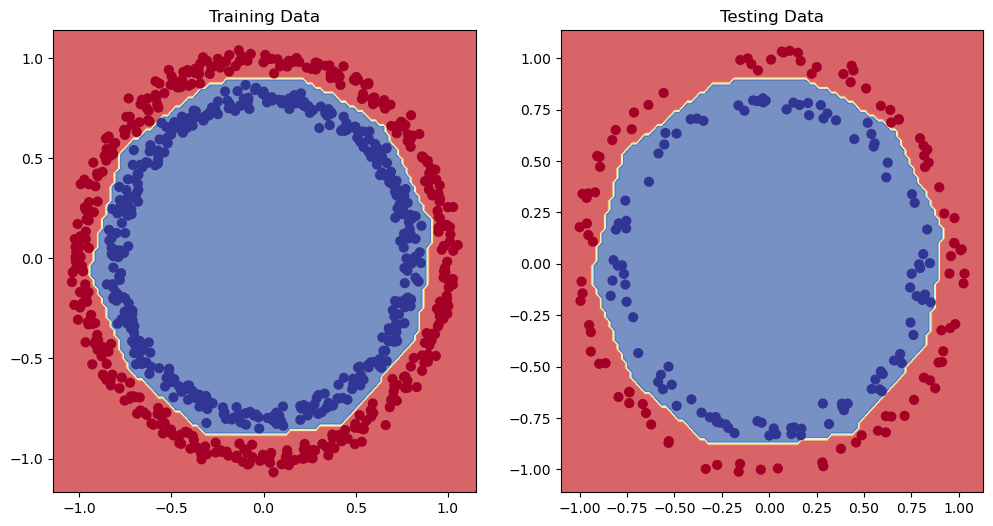

In [48]:
#now, lets see how teh model is envisioning the data:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model,X_train,Y_train)
plt.title("Training Data")

plt.subplot(1,2,2)
plot_decision_boundary(model,X_test,Y_test)
plt.title("Testing Data")

In [49]:
#now, we save our model:

torch.save(obj=model.state_dict(),f=MODEL_PATH)


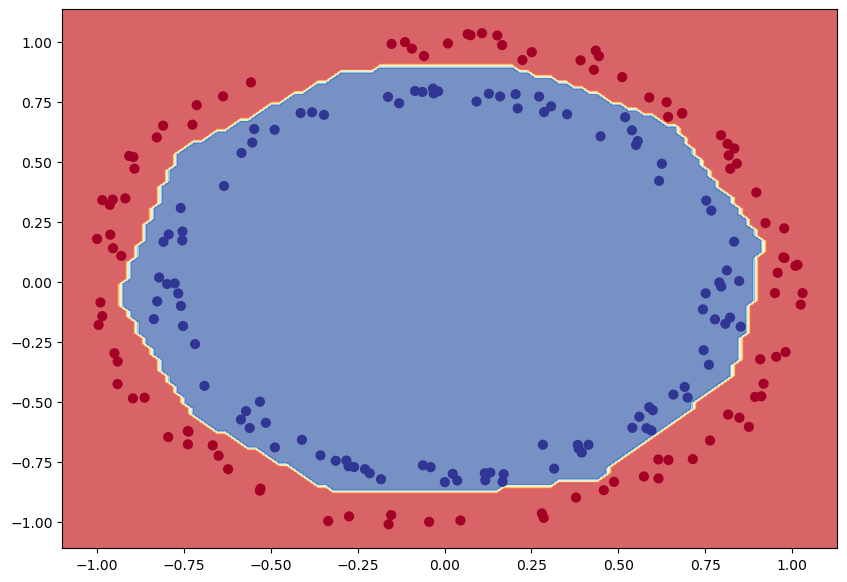

In [52]:
#now reload the model and make an inference on it

model_reloaded = NonLinearCirclesModel().to(device)
model_reloaded.load_state_dict(torch.load(f=MODEL_PATH,weights_only=True))

#now lets do a quick inferrence:

with torch.inference_mode():
    y_loaded_logits_pred = model_reloaded(X_test).squeeze()
    y_loaded_preds = torch.round(torch.sigmoid(y_loaded_logits_pred))
    

plt.figure(figsize=(10,7))
plot_decision_boundary(model=model_reloaded,X=X_test,y=y_loaded_preds)